In [280]:
import re
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange

In [281]:
with open("textFile.txt", "r", encoding='utf8') as f:
    file = f.read()

In [282]:
raw = file.split("CHAPTER")[1:]
print("Number of chapters in the book: ",len(raw))

Number of chapters in the book:  50


In [283]:
book_df = pd.DataFrame({"chapter": raw})

In [284]:
chapters = book_df.copy()
chapters['chapter_num'] = chapters.index+1

In [285]:
chapters

,chapter,chapter_num
0,1\n\n\nThe family of Dashwood had long been s...,1
1,2\n\n\nMrs. John Dashwood now installed herse...,2
2,3\n\n\nMrs. Dashwood remained at Norland seve...,3
3,"4\n\n\n""What a pity it is, Elinor,"" said Mari...",4
4,"5\n\n\nNo sooner was her answer dispatched, t...",5
5,6\n\n\nThe first part of their journey was pe...,6
6,7\n\n\nBarton Park was about half a mile from...,7
7,8\n\n\nMrs. Jennings was a widow with an ampl...,8
8,9\n\n\nThe Dashwoods were now settled at Bart...,9
9,"10\n\n\nMarianne's preserver, as Margaret, wi...",10


In [286]:
chapters['chapter'] = chapters.chapter.str.replace("\n", " ")
chaptersDict = {}
for i in range(len(raw)):
    chaptersDict[i+1] = chapters.loc[i]['chapter']

In [287]:
chaptersDict

{1: ' 1   The family of Dashwood had long been settled in Sussex.  Their estate was large, and their residence was at Norland Park, in the centre of their property, where, for many generations, they had lived in so respectable a manner as to engage the general good opinion of their surrounding acquaintance.  The late owner of this estate was a single man, who lived to a very advanced age, and who for many years of his life, had a constant companion and housekeeper in his sister.  But her death, which happened ten years before his own, produced a great alteration in his home; for to supply her loss, he invited and received into his house the family of his nephew Mr. Henry Dashwood, the legal inheritor of the Norland estate, and the person to whom he intended to bequeath it.  In the society of his nephew and niece, and their children, the old Gentleman\'s days were comfortably spent.  His attachment to them all increased.  The constant attention of Mr. and Mrs. Henry Dashwood to his wish

In [288]:
analyzer = SentimentIntensityAnalyzer()

In [289]:
for book in tqdm(hp, desc='Progress'):
    print(book)
    for chapter in tqdm(hp[book], postfix=book):
#         print('  ', hp[book][chapter][0])
        text = hp[book][chapter][1].replace('\n', '')
        sentence_list = tokenize.sent_tokenize(text)
        sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
        
        for sentence in sentence_list:
            vs = analyzer.polarity_scores(sentence)
            sentiments['compound'] += vs['compound']
            sentiments['neg'] += vs['neg']
            sentiments['neu'] += vs['neu']
            sentiments['pos'] += vs['pos']
            
        sentiments['compound'] = sentiments['compound'] / len(sentence_list)
        sentiments['neg'] = sentiments['neg'] / len(sentence_list)
        sentiments['neu'] = sentiments['neu'] / len(sentence_list)
        sentiments['pos'] = sentiments['pos'] / len(sentence_list)

        hp[book][chapter] = (hp[book][chapter][0], hp[book][chapter][1], sentiments)
#     print()

NameError: name 'hp' is not defined

In [290]:
sentimentsDictionary = {}
for chapter_number,content in tqdm(chaptersDict.items(),desc='Progress'):
    content = content[2:]
    sentence_list = tokenize.sent_tokenize(content)
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    
    for sentence in sentence_list:
            vs = analyzer.polarity_scores(sentence)
            sentiments['compound'] += vs['compound']
            sentiments['neg'] += vs['neg']
            sentiments['neu'] += vs['neu']
            sentiments['pos'] += vs['pos']
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)
    sentimentsDictionary[chapter_number] = sentiments

In [291]:
sentimentsDictionary

{1: {'compound': 0.369456,
  'neg': 0.06013999999999999,
  'neu': 0.7801600000000001,
  'pos': 0.15964},
 2: {'compound': 0.15991414141414137,
  'neg': 0.05204040404040403,
  'neu': 0.8231717171717173,
  'pos': 0.12479797979797982},
 3: {'compound': 0.30499249999999994,
  'neg': 0.0541875,
  'neu': 0.7648875000000002,
  'pos': 0.18086250000000006},
 4: {'compound': 0.25214204545454544,
  'neg': 0.0680681818181818,
  'neu': 0.7920227272727274,
  'pos': 0.13992045454545454},
 5: {'compound': 0.24301818181818188,
  'neg': 0.03727272727272727,
  'neu': 0.8265151515151513,
  'pos': 0.13618181818181818},
 6: {'compound': 0.39313863636363633,
  'neg': 0.02209090909090909,
  'neu': 0.826431818181818,
  'pos': 0.1514772727272727},
 7: {'compound': 0.48736585365853663,
  'neg': 0.04295121951219512,
  'neu': 0.7774634146341465,
  'pos': 0.1796341463414634},
 8: {'compound': 0.0619306451612903,
  'neg': 0.09082258064516129,
  'neu': 0.8295645161290325,
  'pos': 0.07958064516129033},
 9: {'compound

In [292]:
compound_sentiments = [sentimentsDictionary[i+1]['compound'] for i in range(len(sentimentsDictionary))]

In [293]:
print((compound_sentiments))

[0.369456, 0.15991414141414137, 0.30499249999999994, 0.25214204545454544, 0.24301818181818188, 0.39313863636363633, 0.48736585365853663, 0.0619306451612903, 0.20056999999999997, 0.2861809523809525, 0.12142241379310345, 0.19570746268656705, 0.10091428571428572, 0.16834428571428572, 0.07787410071942452, 0.08107692307692306, 0.14650877192982453, 0.16360921052631575, 0.17698428571428573, 0.18865064102564102, 0.2203028037383178, 0.10183600000000004, 0.25223188405797103, 0.20052926829268283, 0.30428, 0.11679052631578943, 0.0772582608695652, 0.0787593220338983, 0.012656976744186055, 0.15862142857142858, 0.07532802547770702, 0.13079693877551019, 0.2732666666666667, 0.33095999999999987, 0.22277395833333333, 0.27376039603960395, 0.08159655172413793, 0.19791239669421484, 0.3407127272727273, 0.26696521739130424, 0.15101954022988512, 0.47595882352941177, 0.07406363636363637, 0.09497656903765689, 0.34040149253731344, 0.21544943820224727, 0.11206703296703292, 0.040531147540983595, 0.2691745454545454,

In [294]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

Text(0, 0.5, 'Average Sentiment')

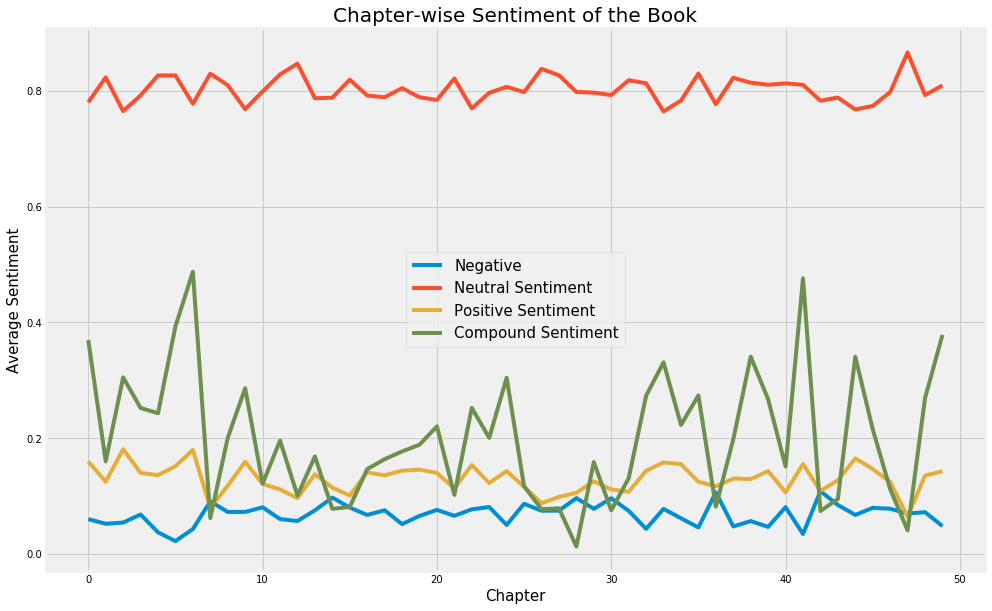

In [295]:
length = len(raw)
neg_sentiment = []
neu_sentiment = []
pos_sentiment = []
compound_sentiment = []

x = np.linspace(0, length - 1, num=length)
for k,v in sentimentsDictionary.items():
    neg_sentiment.append(v['neg'])
    neu_sentiment.append(v['neu'])
    pos_sentiment.append(v['pos'])
    compound_sentiment.append(v['compound'])
plt.figure(figsize=(15, 10))
plt.plot(x,neg_sentiment,label = "Negative")
plt.plot(x,neu_sentiment,label = "Neutral Sentiment")
plt.plot(x,pos_sentiment,label = "Positive Sentiment")
plt.plot(x,compound_sentiment,label = "Compound Sentiment")
plt.legend(loc='best', fontsize=15)
plt.title('Chapter-wise Sentiment of the Book', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)


In [296]:
words_csv = pd.read_csv("words.csv")
words_csv.head()

,Unnamed: 0,word_num,word,sentence_num,chapter_num,lemma,POS,stop
0,0,1,1,1,1,1,X,False
1,1,1,The,2,1,the,DET,True
2,2,2,family,2,1,family,NOUN,False
3,3,3,of,2,1,of,ADP,True
4,4,4,Dashwood,2,1,Dashwood,PROPN,False


In [297]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [298]:
def text_emotion(df,column):
    new_df = df.copy()
    filepath = 'NRC_emotion_lexicon_list.txt'
    
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")  
    
    
    
    book = ''
    chapter = ''
    
    with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            document = word_tokenize(new_df.loc[i][column])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

In [299]:
data = {'chapter_number': [], 'text': []}
for chapter_number,chapter in chaptersDict.items():

    data['chapter_number'].append(chapter_number)
    data['text'].append(chapter[3:])
    
chap_df = pd.DataFrame(data=data)
print(chap_df)

    chapter_number                                               text
0                1    The family of Dashwood had long been settled...
1                2    Mrs. John Dashwood now installed herself mis...
2                3    Mrs. Dashwood remained at Norland several mo...
3                4    "What a pity it is, Elinor," said Marianne, ...
4                5    No sooner was her answer dispatched, than Mr...
5                6    The first part of their journey was performe...
6                7    Barton Park was about half a mile from the c...
7                8    Mrs. Jennings was a widow with an ample join...
8                9    The Dashwoods were now settled at Barton wit...
9               10     Marianne's preserver, as Margaret, with mor...
10              11     Little had Mrs. Dashwood or her daughters i...
11              12     As Elinor and Marianne were walking togethe...
12              13     Their intended excursion to Whitwell turned...
13              14  

In [300]:
chap_df = text_emotion(chap_df, 'text')

In [301]:
chap_df.head()

,chapter_number,text,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,1,The family of Dashwood had long been settled...,19,56,15,15,58,53,98,27,23,71
1,2,Mrs. John Dashwood now installed herself mis...,26,64,13,12,57,62,92,30,25,77
2,3,Mrs. Dashwood remained at Norland several mo...,10,35,8,18,48,45,91,31,13,51
3,4,"""What a pity it is, Elinor,"" said Marianne, ...",13,60,13,23,54,50,99,28,27,74
4,5,"No sooner was her answer dispatched, than Mr...",6,23,10,5,23,25,46,8,9,30


In [302]:
chap_df['word_count'] = chap_df['text'].apply(tokenize.word_tokenize).apply(len)
chap_df.head()

,chapter_number,text,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,1,The family of Dashwood had long been settled...,19,56,15,15,58,53,98,27,23,71,1800
1,2,Mrs. John Dashwood now installed herself mis...,26,64,13,12,57,62,92,30,25,77,2331
2,3,Mrs. Dashwood remained at Norland several mo...,10,35,8,18,48,45,91,31,13,51,1782
3,4,"""What a pity it is, Elinor,"" said Marianne, ...",13,60,13,23,54,50,99,28,27,74,2257
4,5,"No sooner was her answer dispatched, than Mr...",6,23,10,5,23,25,46,8,9,30,1151


In [303]:
emotions = ['anger', 'anticipation','disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise','trust']

In [304]:
for emotion in emotions:
    chap_df[emotion] = chap_df[emotion] / chap_df['word_count']

In [305]:
chap_df.head()

,chapter_number,text,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,1,The family of Dashwood had long been settled...,0.010556,0.031111,0.008333,0.008333,0.032222,0.029444,0.054444,0.015000,0.012778,0.039444,1800
1,2,Mrs. John Dashwood now installed herself mis...,0.011154,0.027456,0.005577,0.005148,0.024453,0.026598,0.039468,0.012870,0.010725,0.033033,2331
2,3,Mrs. Dashwood remained at Norland several mo...,0.005612,0.019641,0.004489,0.010101,0.026936,0.025253,0.051066,0.017396,0.007295,0.028620,1782
3,4,"""What a pity it is, Elinor,"" said Marianne, ...",0.005760,0.026584,0.005760,0.010191,0.023926,0.022153,0.043864,0.012406,0.011963,0.032787,2257
4,5,"No sooner was her answer dispatched, than Mr...",0.005213,0.019983,0.008688,0.004344,0.019983,0.021720,0.039965,0.006950,0.007819,0.026064,1151


In [320]:
import seaborn as sns
sns.set_palette(sns.color_palette("Paired", 20))

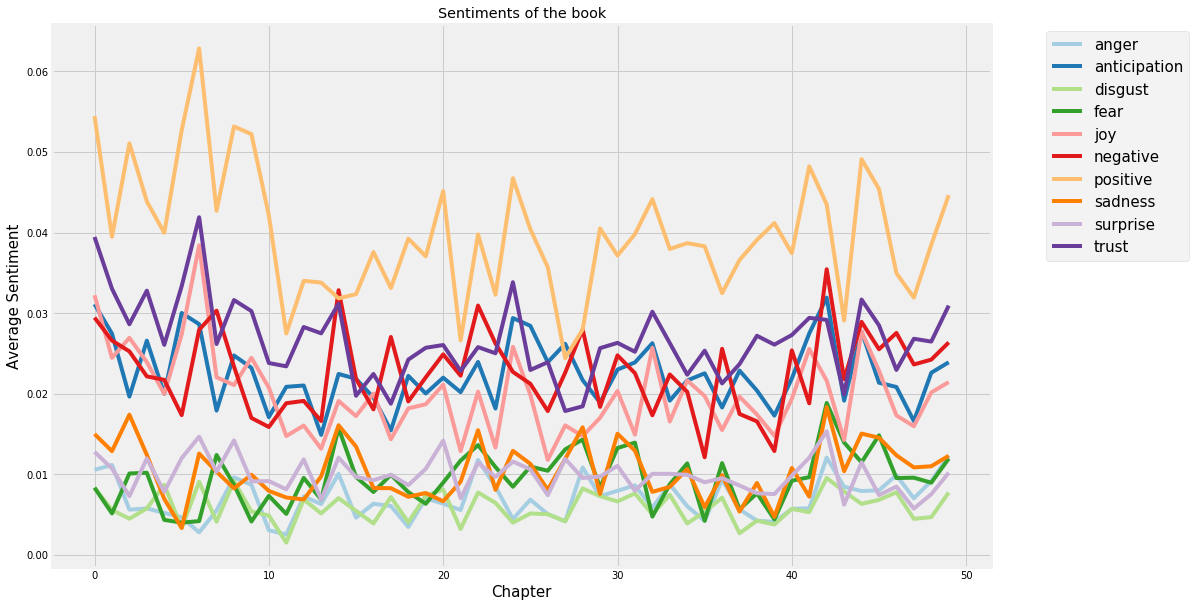

In [321]:
length = len(raw)
x = np.linspace(0, length - 1, num=length)
fig= plt.figure(figsize=(15,10))

for i in range(len(emotions)):
    emo = (emotions[i])
    y = [i for i in chap_df[emo]]
    plt.plot(x,y,label = emo)

plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
plt.title('Sentiments of the book')
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()